In [118]:
import numpy as np
import sklearn.metrics.pairwise as mp
import scipy

X_train = scipy.sparse.load_npz("data/processed_descriptions/train_descriptions.npz")
Y_train = scipy.sparse.load_npz("data/processed_tags/train_tag_nocat_tfdif.npz")

X_test = scipy.sparse.load_npz("data/processed_descriptions/test_descriptions.npz")
Y_test = scipy.sparse.load_npz("data/processed_tags/test_tag_nocat_tfdif.npz")

print(X_train.shape)
print(Y_train.shape)

(10000, 7038)
(10000, 92)


In [125]:
X_train

<10000x7038 sparse matrix of type '<class 'numpy.float64'>'
	with 151698 stored elements in Compressed Sparse Row format>

In [115]:
cs = mp.cosine_similarity(X_train.T, Y_train.T)
cs.shape

(7038, 92)

In [117]:
mapped_tags_test = X_test * cs
mapped_tags_test.shape

(2000, 92)

In [119]:
mapped_desc_imag = mapped_tags_test * Y_test.T
mapped_desc_imag.shape

(2000, 2000)

In [135]:
if not os.path.isdir("output"):
    os.mkdir("output")
with open('output/description_tags_cosine_sim.txt', 'w') as f:
    for i in range(0,X_test.shape[0]):
        row= " ".join([str(img)+".jpg" for img in np.argsort(mapped_desc_imag[i])[::-1][0:20]])
        row = str(i)+".txt,"+row
        f.write("%s\n" % row)


NameError: name 'os' is not defined

269


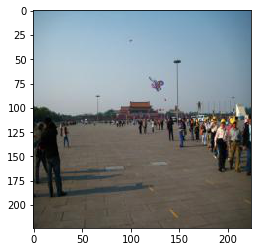

960


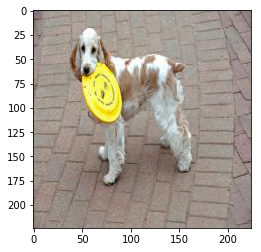

777


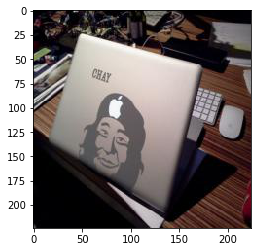

1290


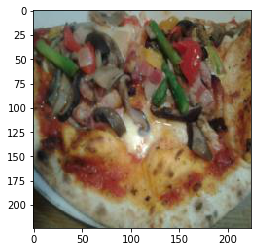

1289


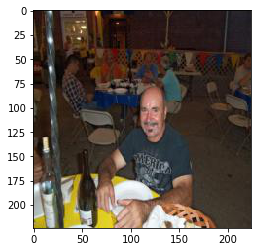

1215


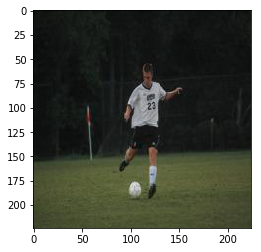

828


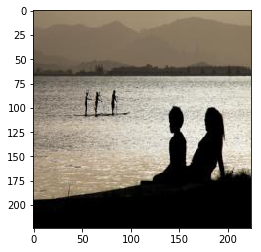

1937


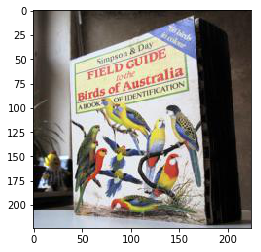

260


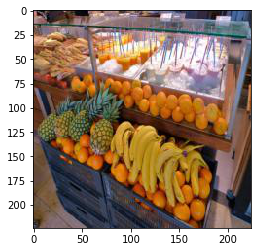

149


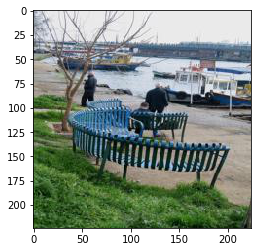

534


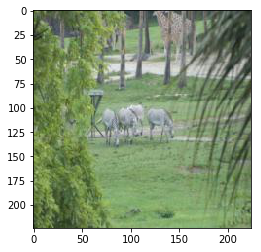

133


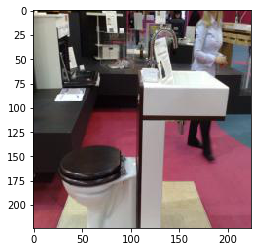

1944


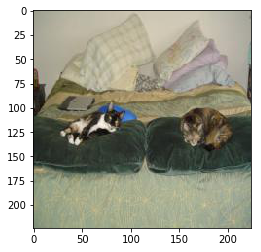

289


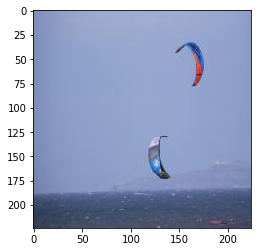

1446


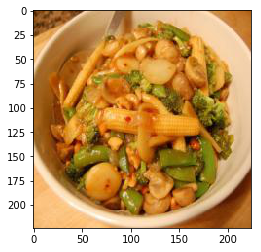

1550


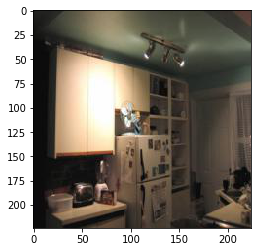

1174


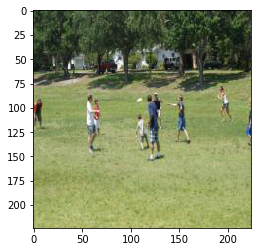

105


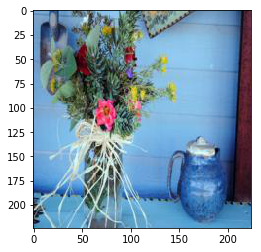

1124


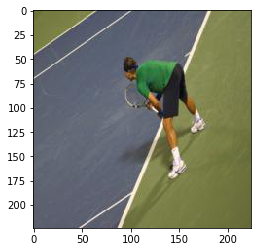

98


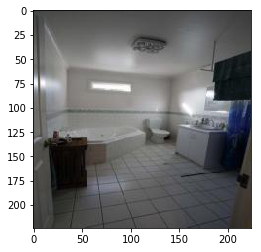

In [134]:
from PIL import Image
import matplotlib.pyplot as plt

for i in np.argsort(mapped_desc_imag[0])[::-1][0:20]:
        print(i)
        img = Image.open("./data/images_train/" + str(i)+".jpg")
        img = np.asarray(img)
        plt.imshow(img)
        plt.show()